In [480]:
#for calculations and manipulation of data
import pandas as pd
import numpy as np
import math

# for graphical representations of data
import matplotlib.pyplot as plt
import seaborn as sns

# for implimentation of linear regression model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics


In [481]:
# read the data into a dataframe.
# change the settings to display all columns because we have so many feeatures. 
data = pd.read_csv(r'C:\Users\Blake Chobanian\Desktop\coding stuff\school performance project\student-mat.csv')
pd.set_option('display.max_rows', None,'display.max_columns', None)
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


In [482]:
# we have 395 rows, and 33 columns. In retrospect, I wish that I had found a larger dataset to do this analysis
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [483]:
print(data.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [484]:
# we can see that there are no null values in the dataset
print(data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


Attribute Information:
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
sex - student's sex (binary: 'F' - female or 'M' - male)
age - student's age (numeric: from 15 to 22)
address - student's home address type (binary: 'U' - urban or 'R' - rural)
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
romantic - with a romantic relationship (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)

Exploratory Data Analysis

Text(0.5, 1.0, 'Second Grade and Last Grade Correlation')

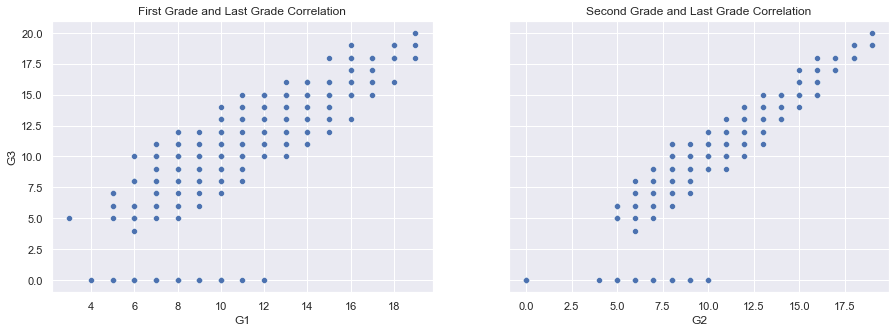

In [485]:
# check to see if early grading period grades are correlated to final grade for the course by graphing them
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.scatterplot(ax = axes[0], data=data, x='G1', y='G3')
axes[0].set_title('First Grade and Last Grade Correlation')
sns.scatterplot(ax = axes[1], data=data, x='G2', y='G3')
axes[1].set_title('Second Grade and Last Grade Correlation')


the grade columns are all highly correlated to final grade. we see that the bands are relatively narrow which means that a students grade in the first or second grading period is a very reliable indicator of how they will do in the rest of the course. The points at the bottoms of the plots represent students that have dropped out after the 1st or 2nd grading period and recieved a final score of 0. 

[Text(0, 0, '1- very poor'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5-excellent')]

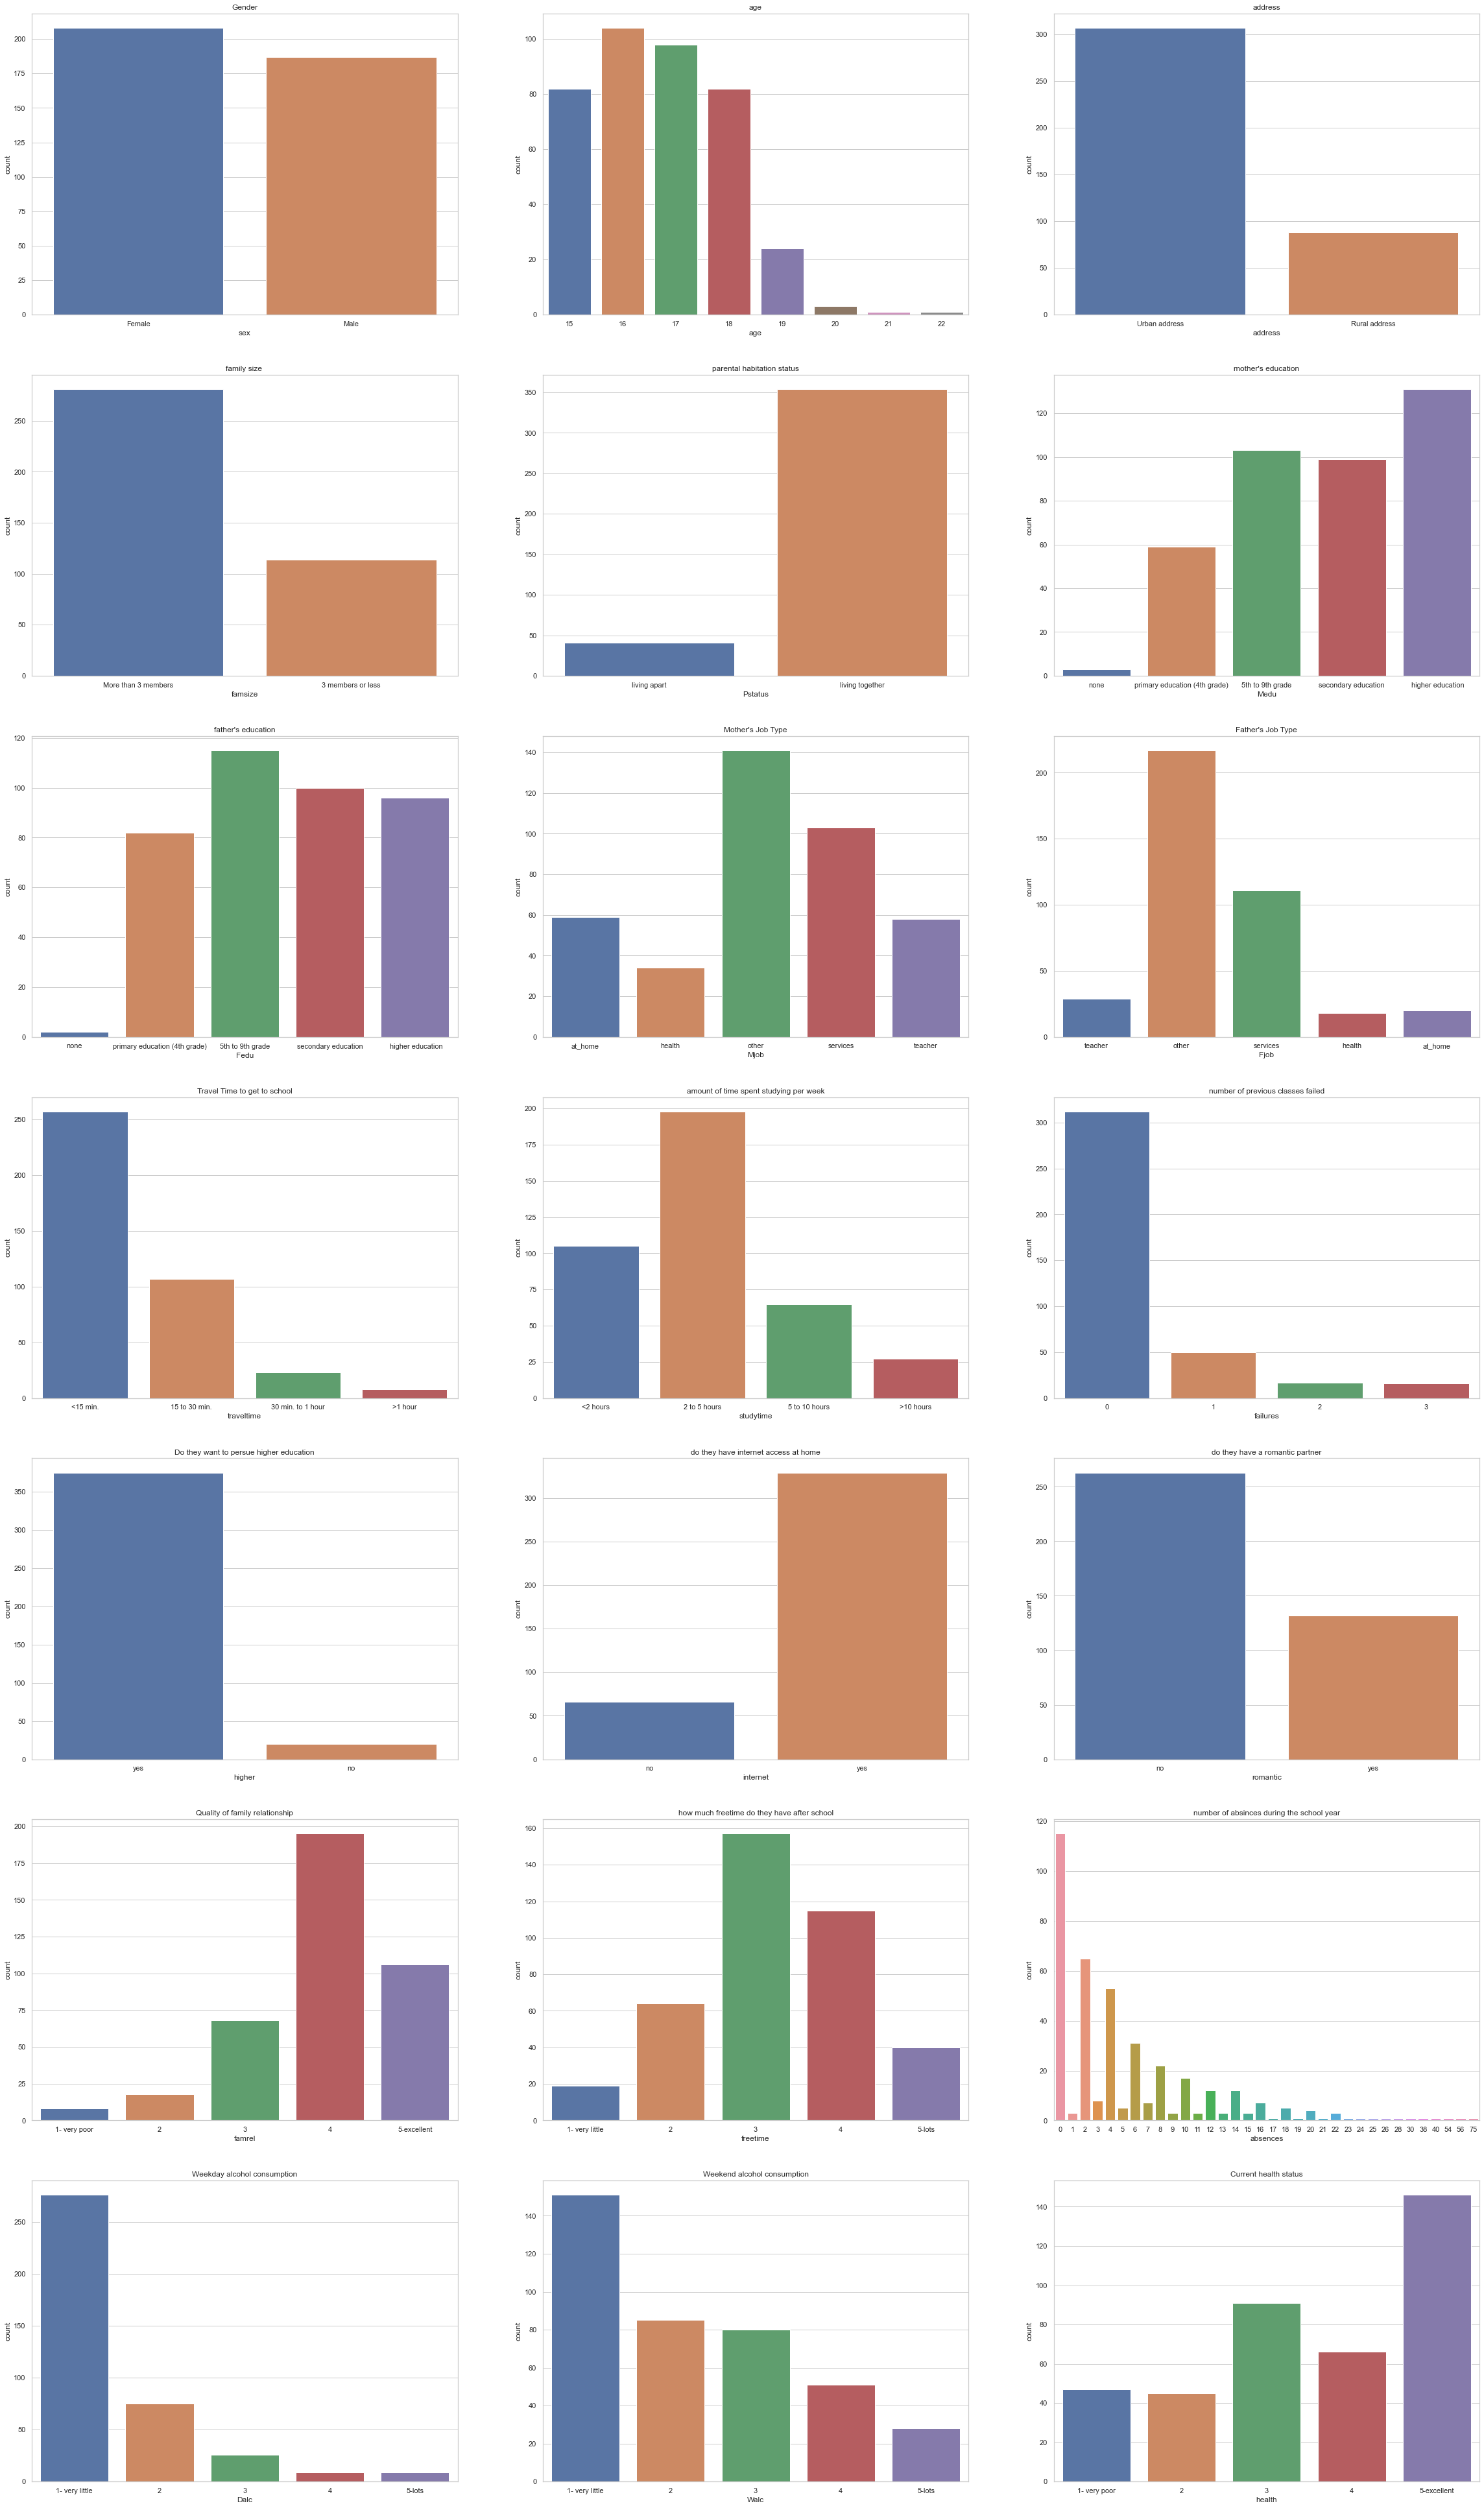

In [486]:
#creating countplots for most of the feature columns in the dataset to get an initial feel for the data
sns.set_style('whitegrid')
fig, axes = plt.subplots(7, 3, figsize=(40, 70))
sns.countplot(ax = axes[0][0], data=data, x='sex')
axes[0][0].set_title('Gender')
axes[0][0].set_xticklabels(['Female','Male'])
sns.countplot(ax = axes[0][1], data=data, x='age')
axes[0][1].set_title('age')
sns.countplot(ax = axes[0][2], data=data, x='address')
axes[0][2].set_title('address')
axes[0][2].set_xticklabels(['Urban address','Rural address'])
sns.countplot(ax = axes[1][0], data=data, x='famsize')
axes[1][0].set_title('family size ')
axes[1][0].set_xticklabels(['More than 3 members','3 members or less'])
sns.countplot(ax = axes[1][1], data=data, x='Pstatus')
axes[1][1].set_title('parental habitation status')
axes[1][1].set_xticklabels(['living apart','living together'])
sns.countplot(ax = axes[1][2], data=data, x='Medu')
axes[1][2].set_title("mother's education")
axes[1][2].set_xticklabels(['none','primary education (4th grade)', '5th to 9th grade', 'secondary education',' higher education'])
sns.countplot(ax = axes[2][0], data=data, x='Fedu')
axes[2][0].set_title("father's education")
axes[2][0].set_xticklabels(['none','primary education (4th grade)', '5th to 9th grade', 'secondary education',' higher education'])
sns.countplot(ax = axes[2][1], data=data, x='Mjob')
axes[2][1].set_title("Mother's Job Type")
sns.countplot(ax = axes[2][2], data=data, x='Fjob')
axes[2][2].set_title("Father's Job Type")
sns.countplot(ax = axes[3][0], data=data, x='traveltime')
axes[3][0].set_title("Travel Time to get to school")
axes[3][0].set_xticklabels(['<15 min.','15 to 30 min.', '30 min. to 1 hour', '>1 hour'])
sns.countplot(ax = axes[3][1], data=data, x='studytime')
axes[3][1].set_title("amount of time spent studying per week")
axes[3][1].set_xticklabels(['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours'])
sns.countplot(ax = axes[3][2], data=data, x='failures')
axes[3][2].set_title("number of previous classes failed")
sns.countplot(ax = axes[4][0], data=data, x='higher')
axes[4][0].set_title("Do they want to persue higher education")
sns.countplot(ax = axes[4][1], data=data, x='internet')
axes[4][1].set_title("do they have internet access at home")
sns.countplot(ax = axes[4][2], data=data, x='romantic')
axes[4][2].set_title("do they have a romantic partner")
sns.countplot(ax = axes[5][0], data=data, x='famrel')
axes[5][0].set_title("Quality of family relationship")
axes[5][0].set_xticklabels(['1- very poor','2','3','4','5-excellent'])
sns.countplot(ax = axes[5][1], data=data, x='freetime')
axes[5][1].set_title("how much freetime do they have after school")
axes[5][1].set_xticklabels(['1- very little','2','3','4','5-lots'])
sns.countplot(ax = axes[5][2], data=data, x='absences')
axes[5][2].set_title("number of absinces during the school year")
sns.countplot(ax = axes[6][0], data=data, x='Dalc')
axes[6][0].set_title("Weekday alcohol consumption")
axes[6][0].set_xticklabels(['1- very little','2','3','4','5-lots'])
sns.countplot(ax = axes[6][1], data=data, x='Walc')
axes[6][1].set_title("Weekend alcohol consumption")
axes[6][1].set_xticklabels(['1- very little','2','3','4','5-lots'])
sns.countplot(ax = axes[6][2], data=data, x='health')
axes[6][2].set_title("Current health status")
axes[6][2].set_xticklabels(['1- very poor','2','3','4','5-excellent'])

A few things that stand out to me:
-most of the students have urban addresses and have internet access. 
-most students have parents that live together and characterize their family relationships as better than average.
-less than a quarter of students have ever failed a course before (that is a final grade less than 10 in Portugal)
-viertually every student has aspirations to go on to college. 
-the graph of the absences looks very suspicious to me. I cant fathom why the even number absences seem to drop asymptotically and consistently to zero... when the odd number absences seem to be far fewer. 
supposition: since the greatest number of absences is 93 (which is a huge number of absences for a course), perhaps these are  number of sessions that they were absent and that perhaps there were multiple multiple sessions per day. If there were an even number of sessions per day (perhaps 2), then being absent for a day would result in an even number of absences. Generally students are out for entire days, so this would result in a greater number of total absences being even numbers. 

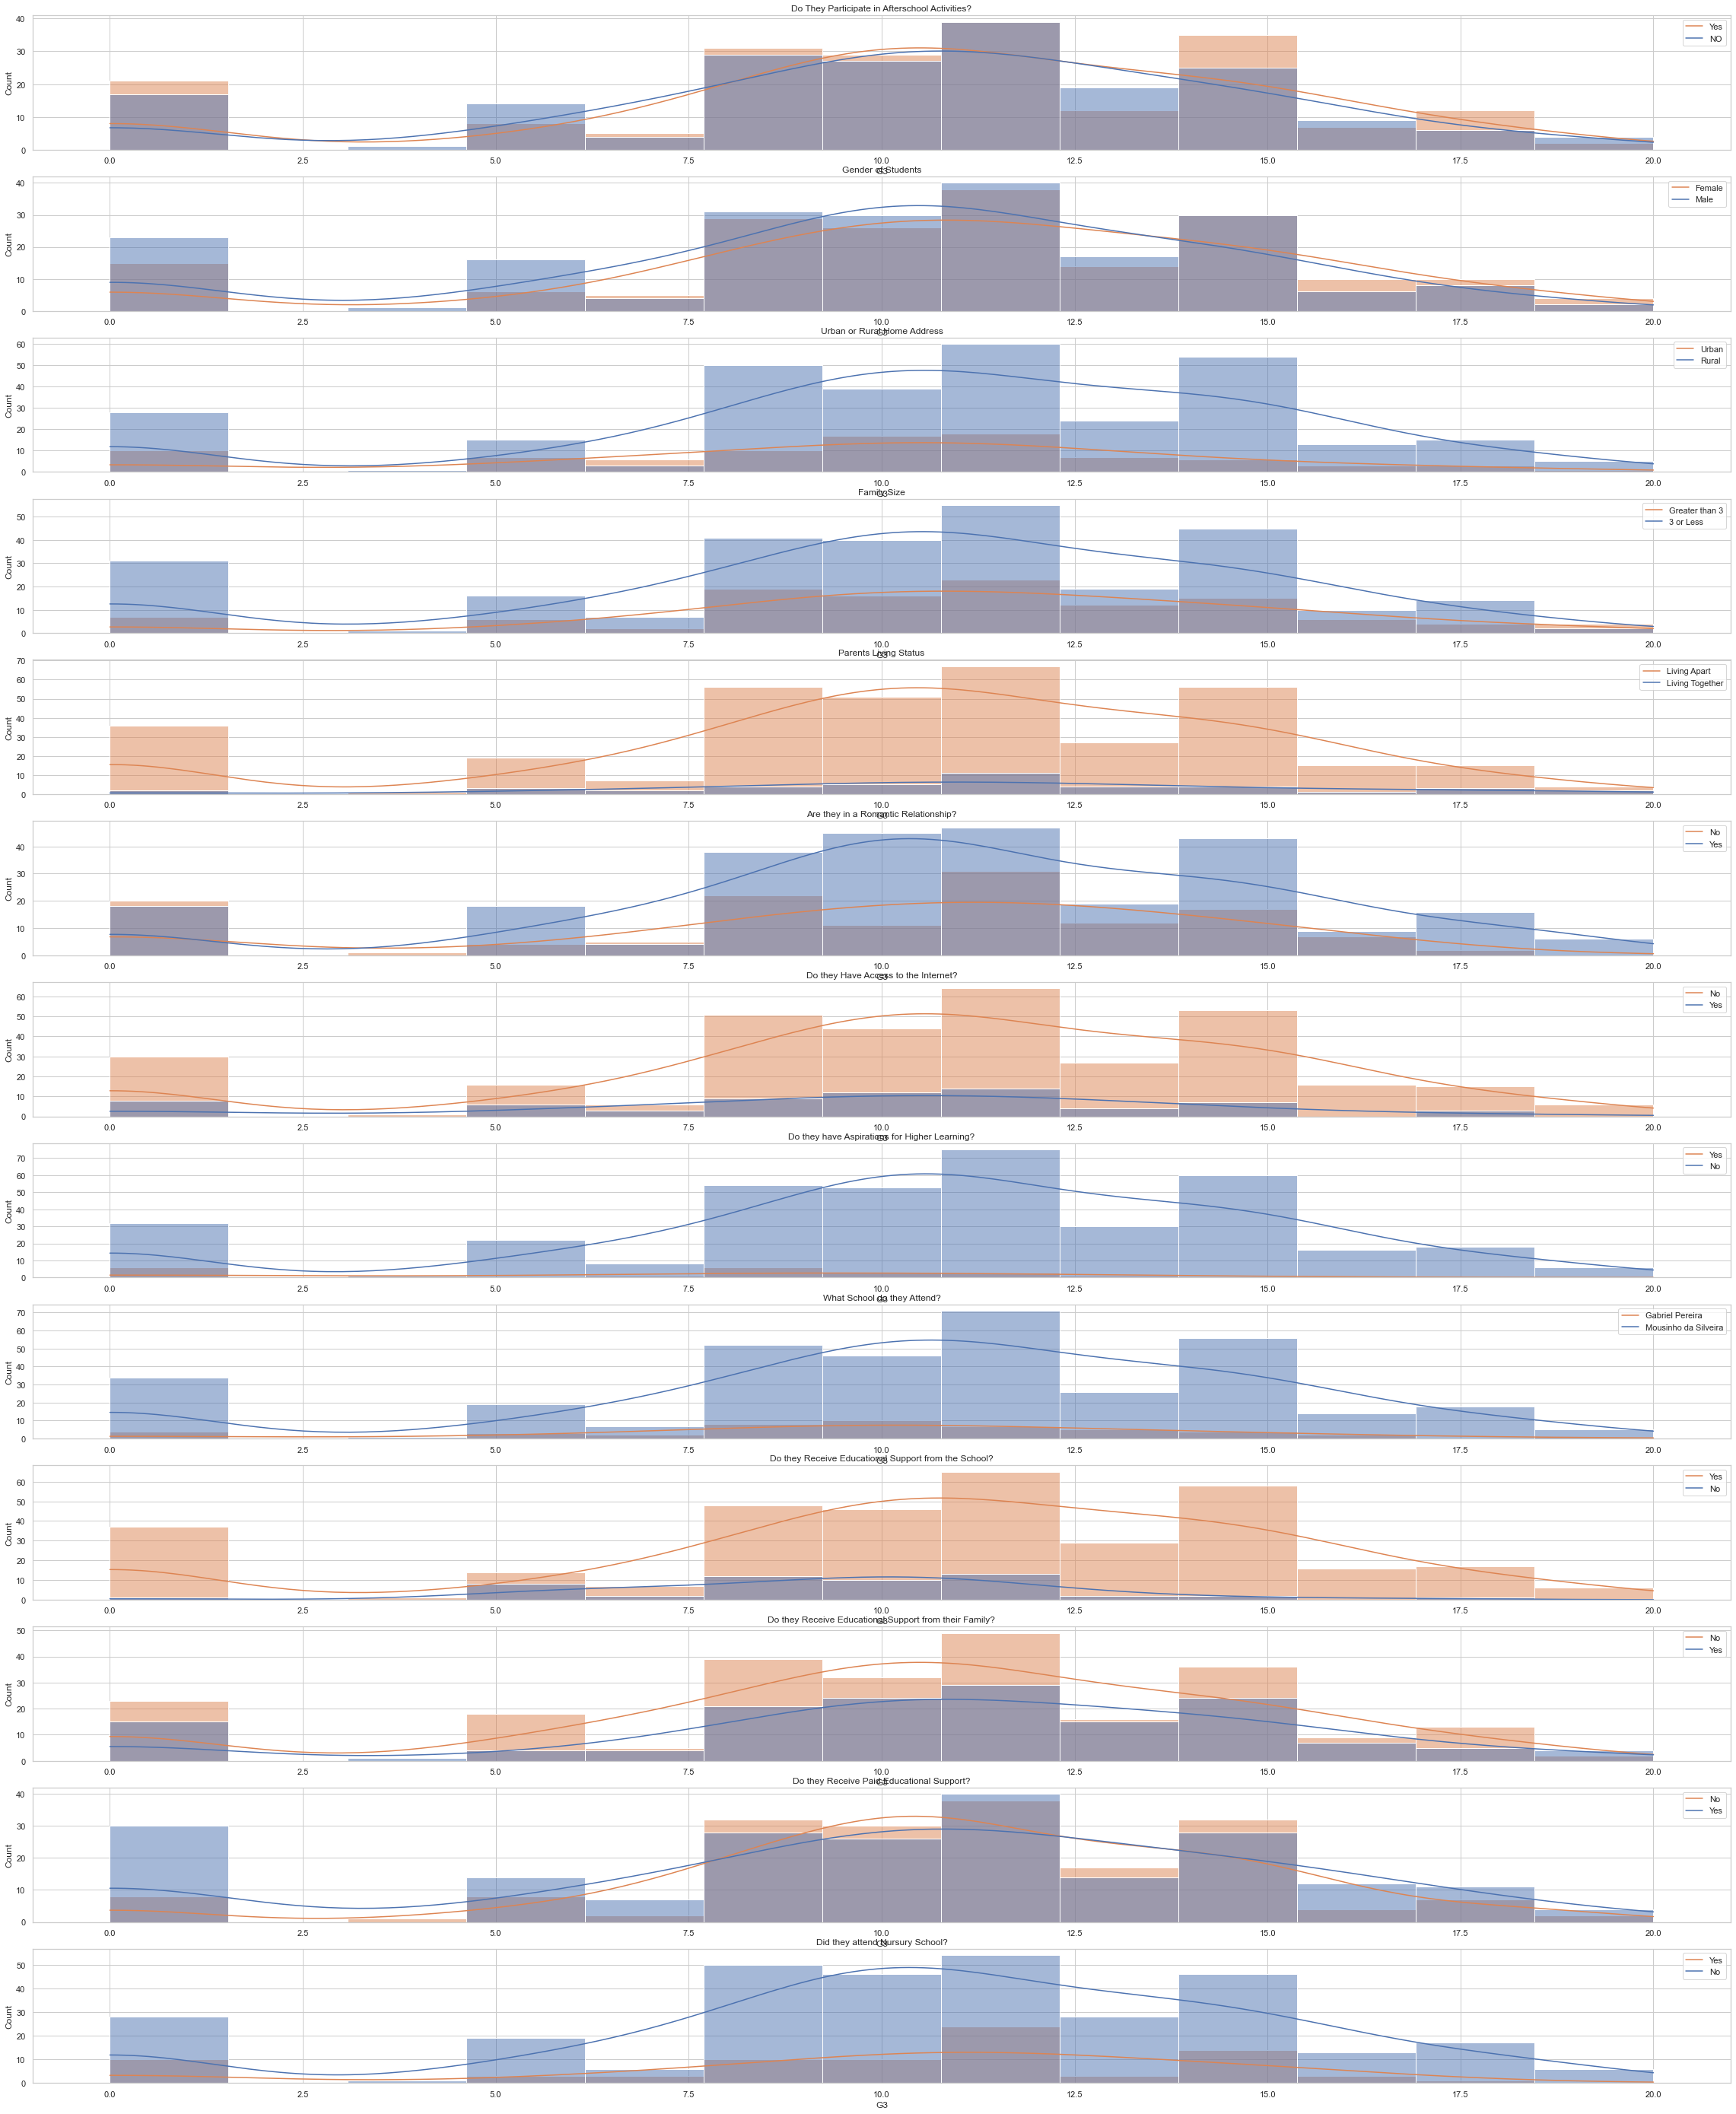

In [487]:
# graph final grade (G3) distributions with different hues dof different binary feature variables to look for patterns
fig, axes = plt.subplots(13, 1, figsize=(40, 50))
sns.histplot(ax = axes[0], data = data, x= 'G3', kde = True, hue = 'activities')
axes[0].set(title = 'Do They Participate in Afterschool Activities?' )
axes[0].legend(labels = ['Yes','NO'])
sns.histplot(ax = axes[1], data = data, x= 'G3', kde = True, hue = 'sex')
axes[1].set(title = 'Gender of Students' )
axes[1].legend(labels = ['Female','Male'])
sns.histplot(ax = axes[2], data = data, x= 'G3', kde = True, hue = 'address')
axes[2].set(title = 'Urban or Rural Home Address' )
axes[2].legend(labels = ['Urban','Rural'])
sns.histplot(ax = axes[3], data = data, x= 'G3', kde = True, hue = 'famsize')
axes[3].set(title = 'Family Size' )
axes[3].legend(labels = ['Greater than 3','3 or Less'])
sns.histplot(ax = axes[4], data = data, x= 'G3', kde = True, hue = 'Pstatus')
axes[4].set(title = 'Parents Living Status' )
axes[4].legend(labels = ['Living Apart','Living Together'])
sns.histplot(ax = axes[5], data = data, x= 'G3', kde = True, hue = 'romantic')
axes[5].set(title = 'Are they in a Romantic Relationship?' )
axes[5].legend(labels = ['No','Yes'])
sns.histplot(ax = axes[6], data = data, x= 'G3', kde = True, hue = 'internet')
axes[6].set(title = 'Do they Have Access to the Internet?')
axes[6].legend(labels = ['No','Yes'])
sns.histplot(ax = axes[7], data = data, x= 'G3', kde = True, hue = 'higher')
axes[7].set(title = 'Do they have Aspirations for Higher Learning?' )
axes[7].legend(labels = ['Yes','No'])
sns.histplot(ax = axes[8], data = data, x= 'G3', kde = True, hue = 'school')
axes[8].set(title = 'What School do they Attend?' )
axes[8].legend(labels = ['Gabriel Pereira','Mousinho da Silveira'])
sns.histplot(ax = axes[9], data = data, x= 'G3', kde = True, hue = 'schoolsup')
axes[9].set(title = 'Do they Receive Educational Support from the School?' )
axes[9].legend(labels = ['Yes','No'])
sns.histplot(ax = axes[10], data = data, x= 'G3', kde = True, hue = 'famsup')
axes[10].set(title = 'Do they Receive Educational Support from their Family?' )
axes[10].legend(labels = ['No','Yes'])
sns.histplot(ax = axes[11], data = data, x= 'G3', kde = True, hue = 'paid')
axes[11].set(title = 'Do they Receive Paid Educational Support?' )
axes[11].legend(labels = ['No','Yes'])
sns.histplot(ax = axes[12], data = data, x= 'G3', kde = True, hue = 'nursery')
axes[12].set(title = 'Did they attend Nursury School?' )
axes[12].legend(labels = ['Yes','No'])

a few things that stand out:
- in this dataset, boys slightly outperformed girls
-having a romantic relationship increased a student's odds of dropping out
-most students were interested in persuing a higher education. Those who did not, performed worse overall. 
-students who recieved school support were less likely to drop out (receive a 0 final grade), but if they passed, they performed worse than other students. 
-the highest, and lowest, performing students paid for outside support at a lower rate than those who fell towards the middle of the curve. 

In [488]:
# look at the counts of final grades and number of failures
print(data['G3'].value_counts().sort_index())
print('__________________')
print(data['failures'].value_counts())

0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: G3, dtype: int64
__________________
0    312
1     50
2     17
3     16
Name: failures, dtype: int64


we can see that nearly 10% of students revieved a 0 as a final grade. It is interesting to note that a relatively small number of students had failed a previous class, and yet the pass rate here is only 67%. If we remove the zeros from the set, we still only get a 74% pass rate. This is much lower than I would have expected. since 79% of these students have never failed a class in the past. 

[Text(0.5, 1.0, 'Final Grades by How Often they go out with Friends')]

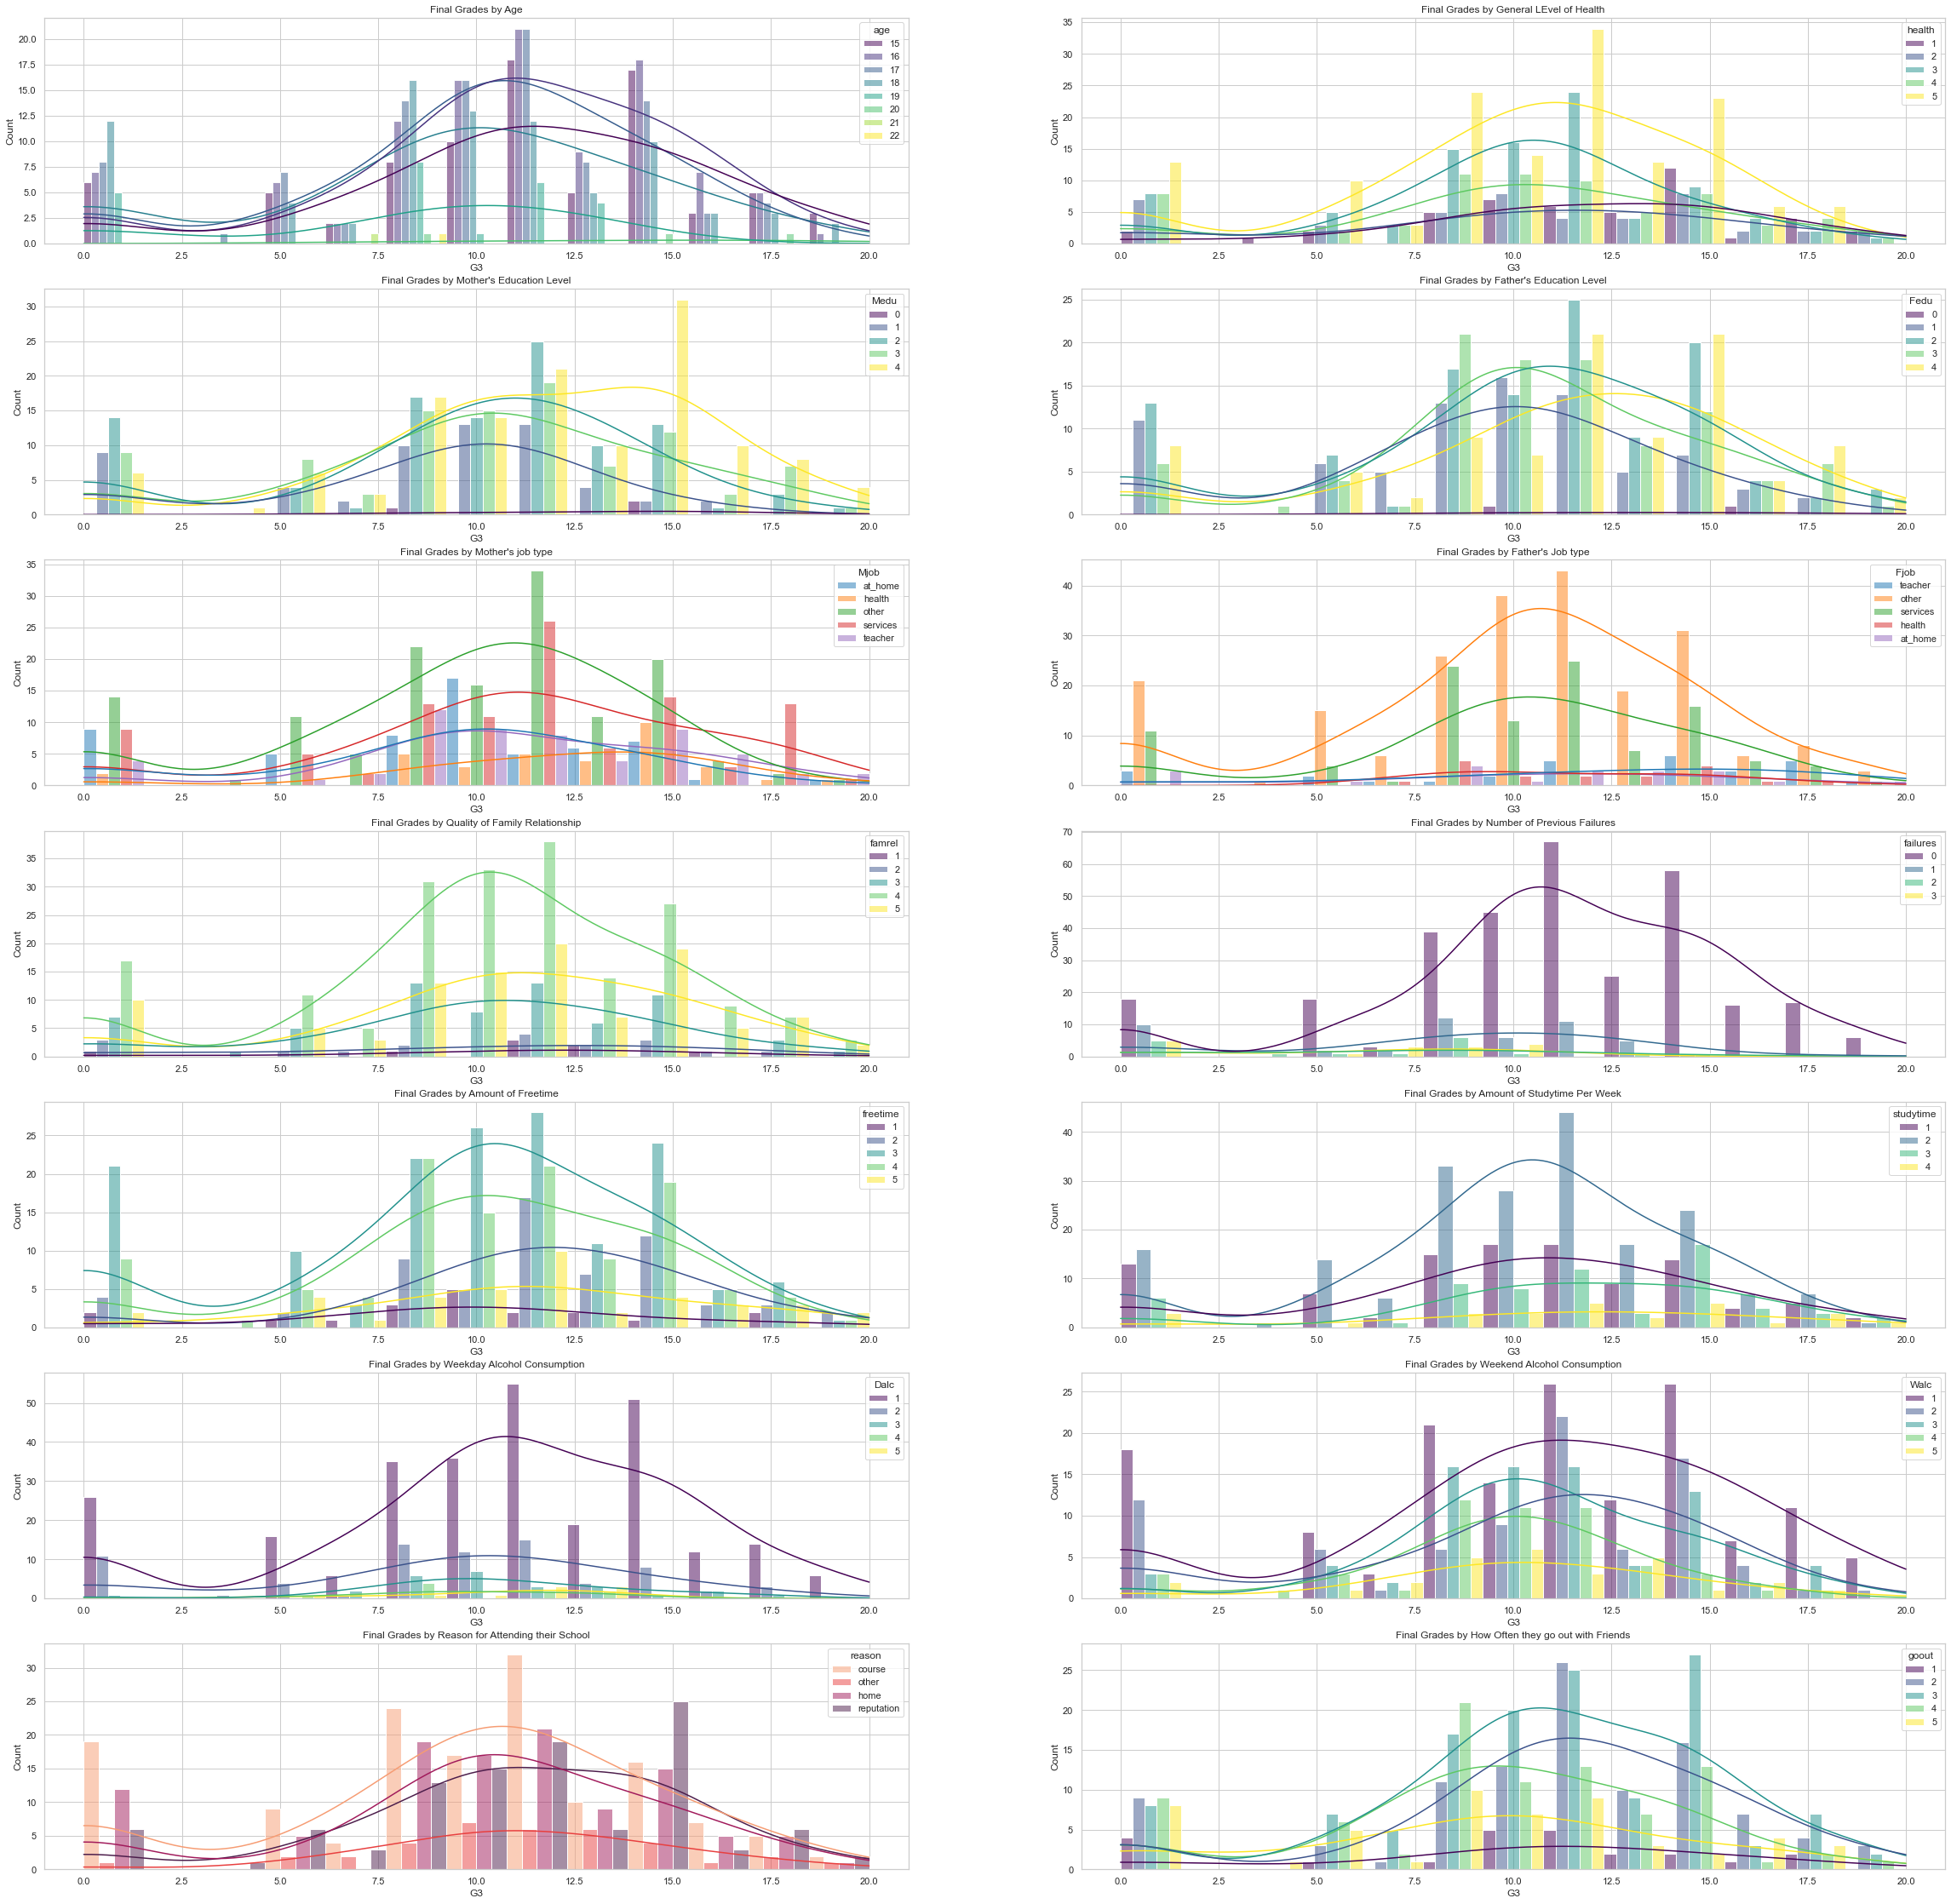

In [489]:
# graph final grade (G3) distributions with different hues of different non-binary feature variables to look for patterns
fig, axes = plt.subplots(7, 2, figsize=(40, 40))
sns.histplot(ax = axes[0][0], data = data, x= 'G3', kde = True, hue = 'age', palette = 'viridis', multiple = 'dodge' )
axes[0][0].set(title = 'Final Grades by Age' )
sns.histplot(ax = axes[0][1], data = data, x= 'G3', kde = True, hue = 'health', palette = 'viridis', multiple = 'dodge' )
axes[0][1].set(title = 'Final Grades by General LEvel of Health' )
sns.histplot(ax = axes[1][0], data = data, x= 'G3', kde = True, hue = 'Medu', palette = 'viridis', multiple = 'dodge' )
axes[1][0].set(title = "Final Grades by Mother's Education Level" )
sns.histplot(ax = axes[1][1], data = data, x= 'G3', kde = True, hue = 'Fedu', palette = 'viridis', multiple = 'dodge' )
axes[1][1].set(title = "Final Grades by Father's Education Level" )
sns.histplot(ax = axes[2][0], data = data, x= 'G3', kde = True, hue = 'Mjob', palette = 'tab10', multiple = 'dodge' )
axes[2][0].set(title = "Final Grades by Mother's job type" )
sns.histplot(ax = axes[2][1], data = data, x= 'G3', kde = True, hue = 'Fjob', palette = 'tab10', multiple = 'dodge' )
axes[2][1].set(title = "Final Grades by Father's Job type" )
sns.histplot(ax = axes[3][0], data = data, x= 'G3', kde = True, hue = 'famrel', palette = 'viridis', multiple = 'dodge' )
axes[3][0].set(title = "Final Grades by Quality of Family Relationship" )
sns.histplot(ax = axes[3][1], data = data, x= 'G3', kde = True, hue = 'failures', palette = 'viridis', multiple = 'dodge' )
axes[3][1].set(title = "Final Grades by Number of Previous Failures" )
sns.histplot(ax = axes[4][0], data = data, x= 'G3', kde = True, hue = 'freetime', palette = 'viridis', multiple = 'dodge' )
axes[4][0].set(title = "Final Grades by Amount of Freetime" )
sns.histplot(ax = axes[4][1], data = data, x= 'G3', kde = True, hue = 'studytime', palette = 'viridis', multiple = 'dodge' )
axes[4][1].set(title = "Final Grades by Amount of Studytime Per Week" )
sns.histplot(ax = axes[5][0], data = data, x= 'G3', kde = True, hue = 'Dalc', palette = 'viridis', multiple = 'dodge' )
axes[5][0].set(title = "Final Grades by Weekday Alcohol Consumption" )
sns.histplot(ax = axes[5][1], data = data, x= 'G3', kde = True, hue = 'Walc', palette = 'viridis', multiple = 'dodge' )
axes[5][1].set(title = "Final Grades by Weekend Alcohol Consumption" )
sns.histplot(ax = axes[6][0], data = data, x= 'G3', kde = True, hue = 'reason', palette = 'rocket_r', multiple = 'dodge' )
axes[6][0].set(title = "Final Grades by Reason for Attending their School" )
sns.histplot(ax = axes[6][1], data = data, x= 'G3', kde = True, hue = 'goout', palette = 'viridis', multiple = 'dodge' )
axes[6][1].set(title = "Final Grades by How Often they go out with Friends" )

trends:
-younger students tended to do slightly better
-health only really made a difference for the healthiest students
-parents having gone to college made a positive impact. having parents that went to highschool but didnt finish was better than having parents that graduated (?) but smaller impact than college
- having a mother in health care, or father in education was correlated with higher grades... but there are relatively few of these. 
-family relationship quality had surprisingly low impact
-study time correlated with higher grades
-alcohol consumption correlated with lower grades. 
-students who chose their school based on reputation tended to do better
-sudents did the best when they went out with friends some but not too much

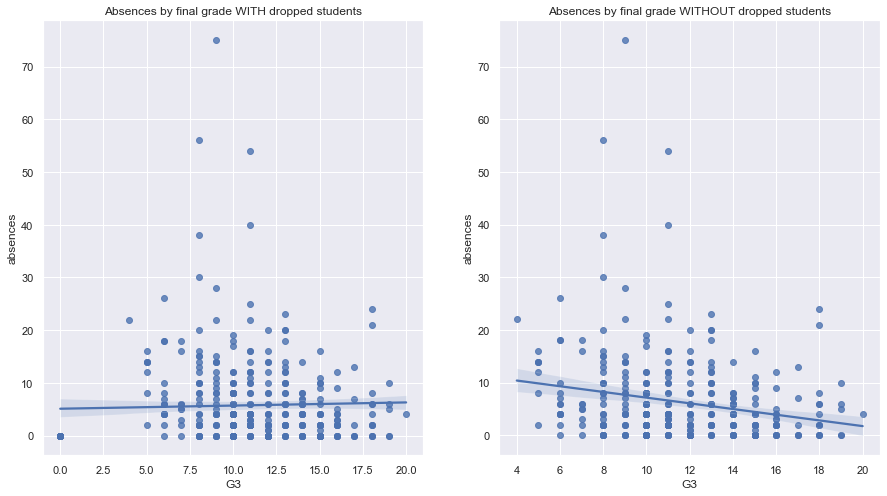

In [509]:
#graph absences as a function of final grade to look for a trend. 
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.regplot(ax = axes[0], data = data, x = 'G3', y= 'absences')
# after noticing that 38 students recieved 0's and had 0 absinces... this had a significant impact on the trend line. 
data_without_zeros = data[data['G3']!=0]
sns.regplot(ax = axes[1], data = data_without_zeros, x = 'G3', y= 'absences')
axes[0].title.set_text('Absences by final grade WITH dropped students')
axes[1].title.set_text('Absences by final grade WITHOUT dropped students')

it looks like there is virtually no correlation between final grade and abences. but the students that didnt complete the course are skewing the data. it looks like people who got a final grade of 0, dropped out becasue they are counted as having 0 absences and almost all attended the same school.

Feature Engineering
we will start by converting binary yes/no to 1,0
replacing binary entries to 1,0
getting dummy variables for: Mjob,Fjob,reason,guardian

In [491]:
data.schoolsup.replace(('yes','no'), (1,0,), inplace= True)
data.famsup.replace(('yes','no'), (1,0,), inplace= True)
data.paid.replace(('yes','no'), (1,0,), inplace= True)
data.activities.replace(('yes','no'), (1,0,), inplace= True)
data.nursery.replace(('yes','no'), (1,0,), inplace= True)
data.higher.replace(('yes','no'), (1,0,), inplace= True)
data.internet.replace(('yes','no'), (1,0,), inplace= True)
data.romantic.replace(('yes','no'), (1,0,), inplace= True)
data.school.replace(('GP','MS'), (1,0,), inplace= True)
data.sex.replace(('M','F'), (1,0,), inplace= True)
data.address.replace(('U','R'), (1,0,), inplace= True)
data.famsize.replace(('GT3','LE3'), (1,0,), inplace= True)
data.Pstatus.replace(('T','A'), (1,0,), inplace= True)
data = pd.get_dummies(data, columns = ['Mjob','Fjob','reason','guardian'])
# create a second target variable... improvement to see what contributes to grades increasing over the course
data['improvement']=data['G3']-data['G1']
# verify that all feature variables are integers. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             395 non-null    int64
 1   sex                395 non-null    int64
 2   age                395 non-null    int64
 3   address            395 non-null    int64
 4   famsize            395 non-null    int64
 5   Pstatus            395 non-null    int64
 6   Medu               395 non-null    int64
 7   Fedu               395 non-null    int64
 8   traveltime         395 non-null    int64
 9   studytime          395 non-null    int64
 10  failures           395 non-null    int64
 11  schoolsup          395 non-null    int64
 12  famsup             395 non-null    int64
 13  paid               395 non-null    int64
 14  activities         395 non-null    int64
 15  nursery            395 non-null    int64
 16  higher             395 non-null    int64
 17  internet        

In [492]:
#check correlation with final grades
data.corr(method='pearson').loc['G3'].sort_values(ascending = False)

G3                   1.000000
G2                   0.904868
G1                   0.801468
improvement          0.695467
Medu                 0.217147
higher               0.182465
Fedu                 0.152457
Mjob_health          0.116158
address              0.105756
sex                  0.103456
paid                 0.101996
internet             0.098483
studytime            0.097820
reason_reputation    0.095692
Fjob_teacher         0.095374
Mjob_services        0.078429
Mjob_teacher         0.057712
Fjob_health          0.057111
reason_other         0.052008
nursery              0.051568
famrel               0.051363
school               0.045017
absences             0.034247
guardian_father      0.032493
guardian_mother      0.022338
activities           0.016100
freetime             0.011307
Fjob_at_home        -0.013385
Fjob_services       -0.016108
reason_home         -0.021359
famsup              -0.039157
Walc                -0.051939
Fjob_other          -0.053483
Dalc      

disregarding the correlation with other grade columns in the set:
features most correlated with high performance: mother's education level, desire to go to college, father's education level
features most correlated with poor performance: previous failures, age, going out frequently

In [493]:
#check correlations with improving grades
data.corr(method='pearson').loc['improvement'].sort_values(ascending = False)

improvement          1.000000
G3                   0.695467
G2                   0.476838
G1                   0.127670
paid                 0.122201
schoolsup            0.118152
Medu                 0.113406
reason_other         0.094921
absences             0.094048
address              0.091640
higher               0.088420
internet             0.077278
Walc                 0.065469
sex                  0.061229
famrel               0.058548
Fjob_health          0.052298
guardian_mother      0.051185
Mjob_health          0.048370
Fjob_other           0.048183
school               0.043742
reason_reputation    0.039123
Mjob_other           0.037553
famsup               0.036671
Mjob_services        0.026852
Fedu                 0.024228
Dalc                 0.022483
guardian_father      0.014067
freetime             0.003598
nursery              0.002301
Mjob_teacher         0.001641
Fjob_services       -0.008579
health              -0.013802
reason_home         -0.014760
studytime 

disregarding the correlation with other grade columns in the set:
features most correlated with improvement: getting paid outside help, getting school suport, and mother's education
features most correlated with grade decline: age, previous failures, having a romantic relationship. 

<AxesSubplot:>

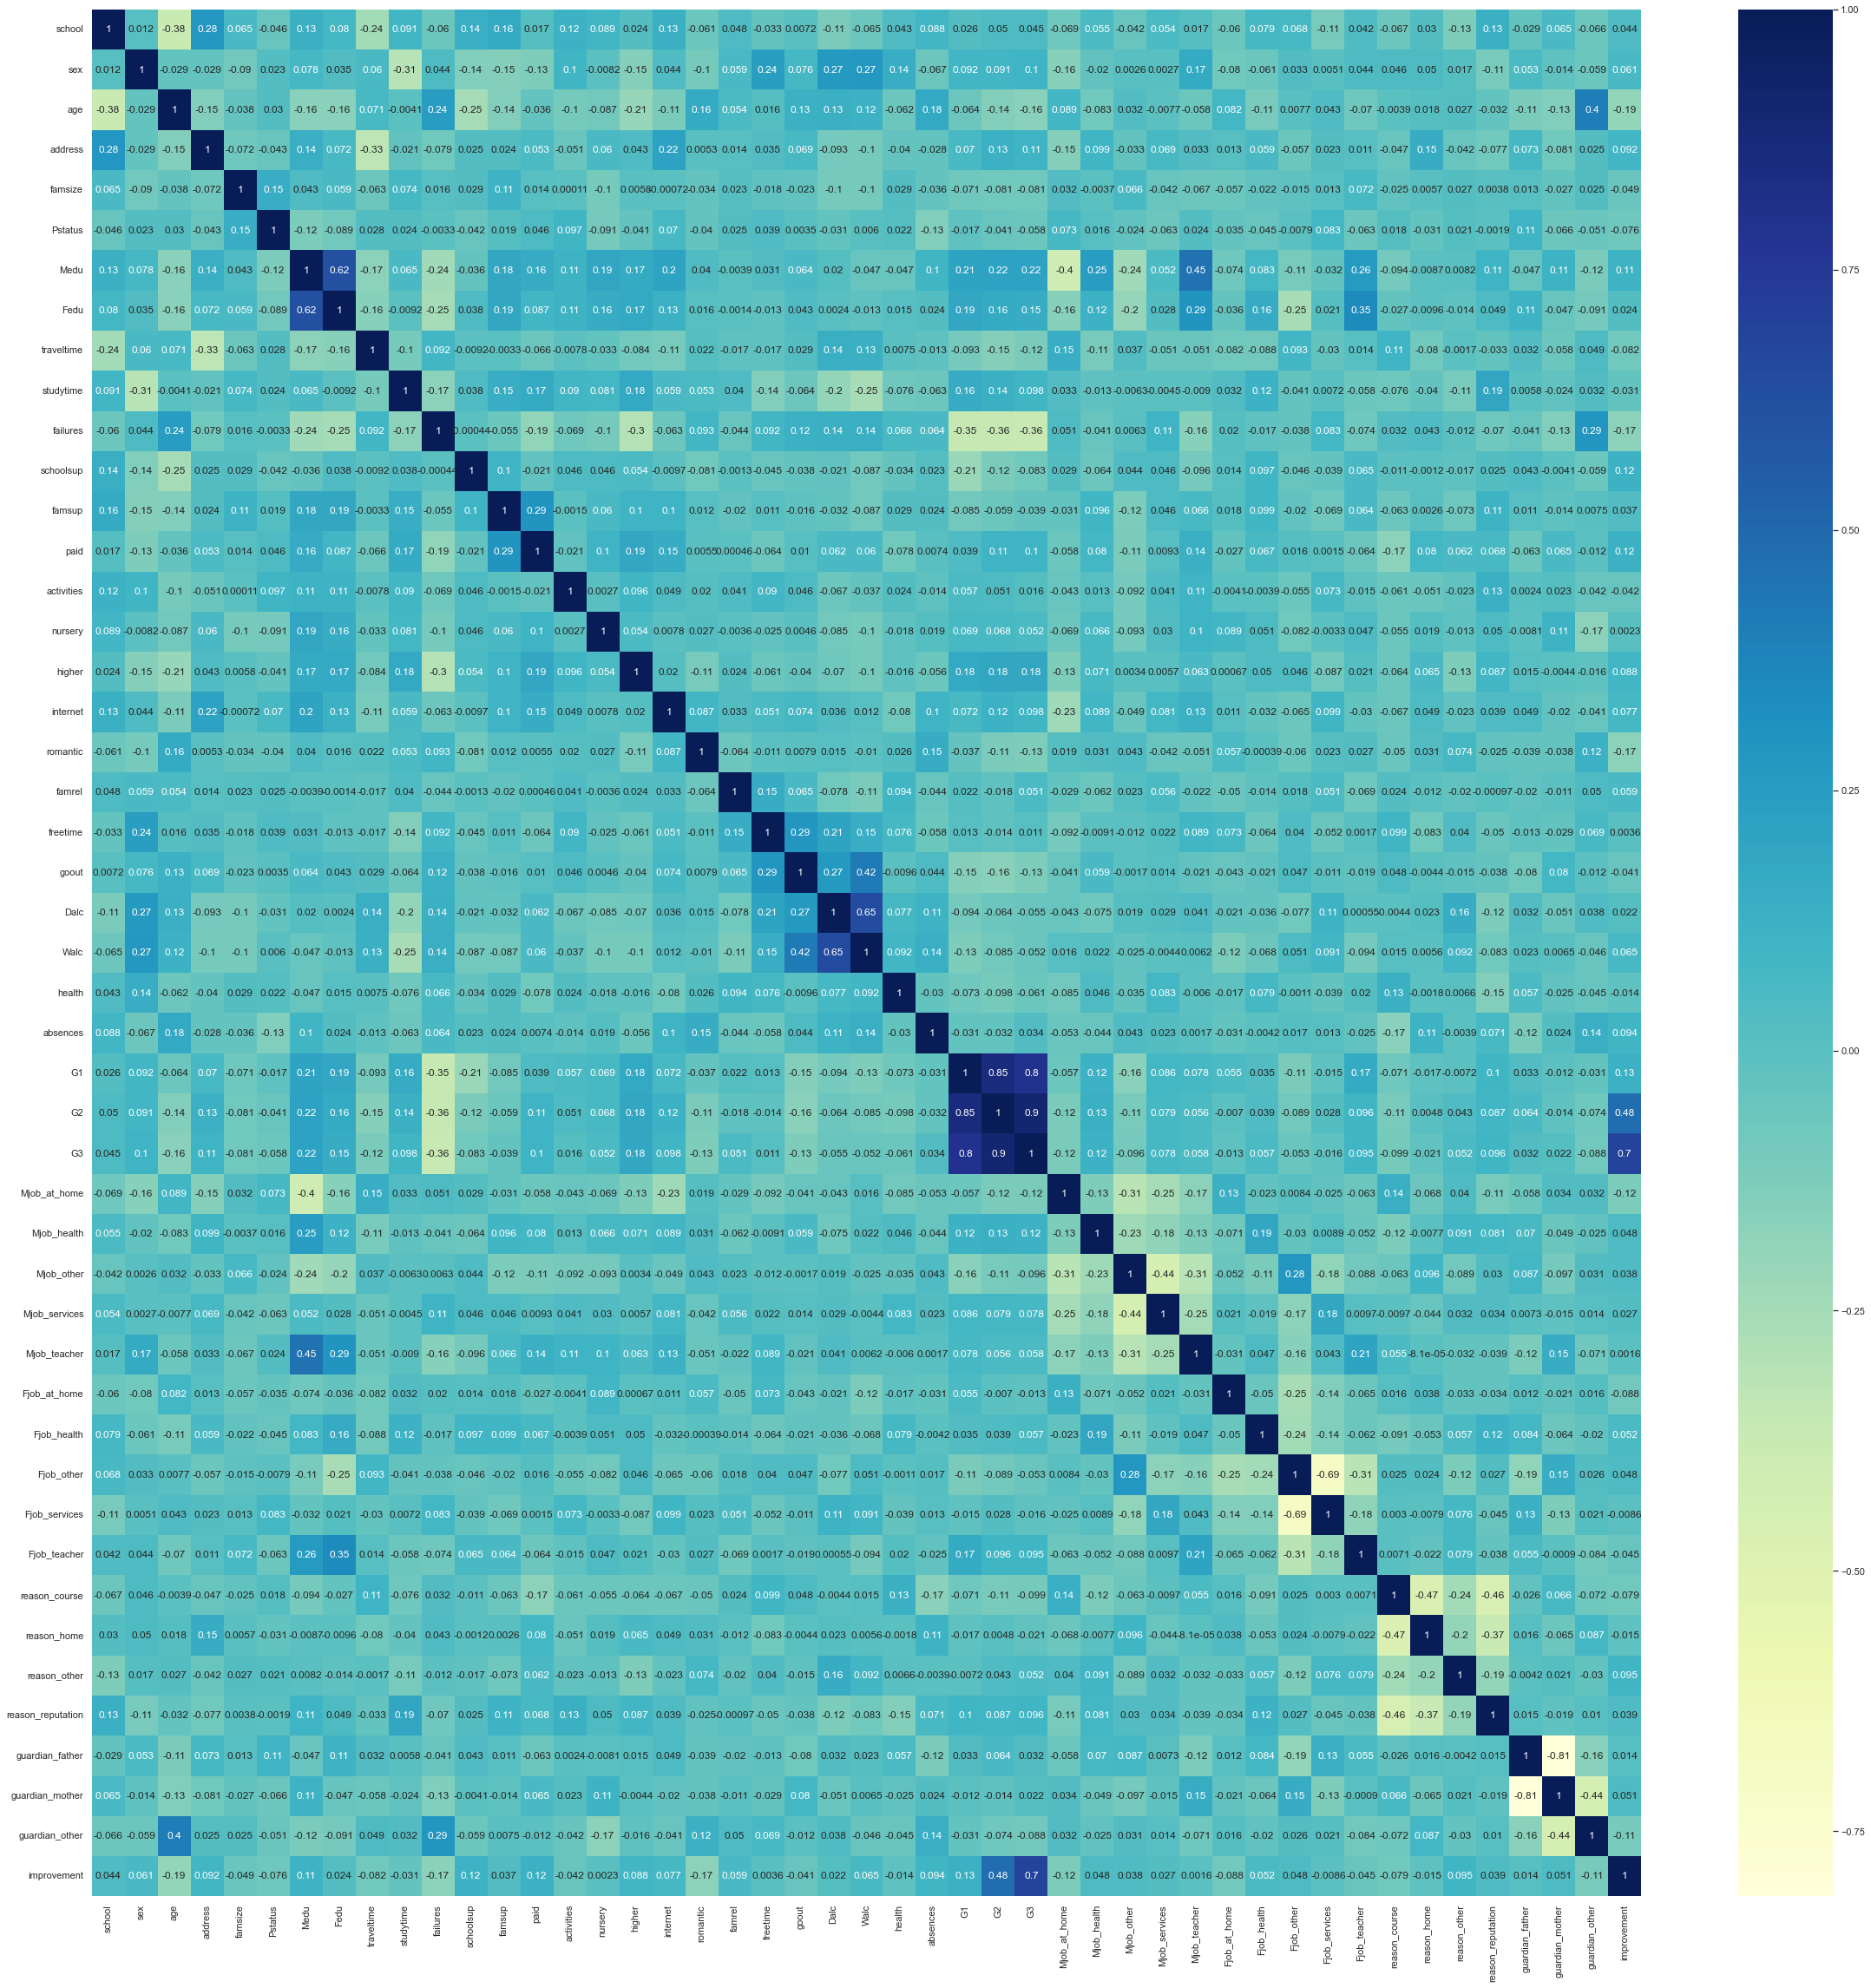

In [494]:
#create a heat map to look for high correlations between other variables. 
sns.set(rc = {'figure.figsize':(40,40)})
sns.heatmap(data.corr(), cmap= 'YlGnBu', annot=True)

we can see correlations between parents educations and their careers. 
we can also see that mother's and father's education levels correlate with eachother
we can also see that one school serves primarily rural students and that those students have longer travel times to make it to school. 

<AxesSubplot:xlabel='Walc', ylabel='Dalc'>

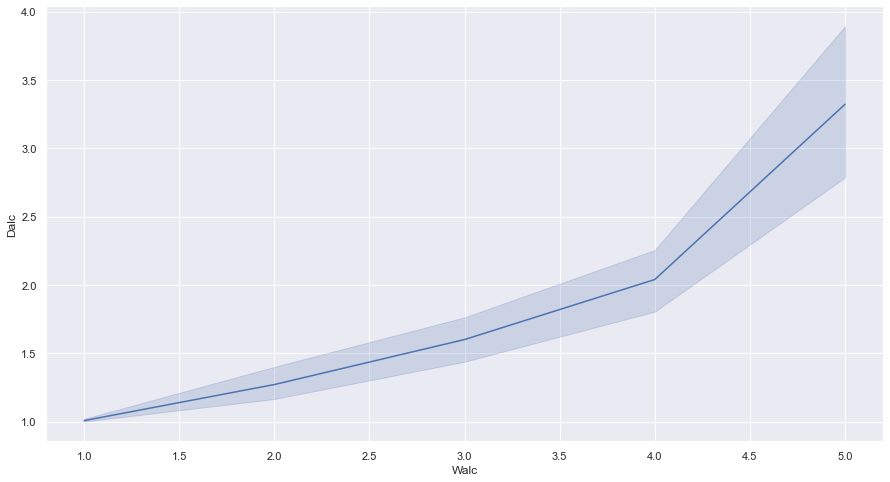

In [495]:
# check the relationship between weekend and weekday alcohol consumption
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='Walc',y='Dalc', data=data)

weekday and weekend alcohol use is correlated, even if the relationship is not linear. 

In [496]:
# new column for if the guardian is either the mother or father
data['bio_parent_guardian'] =data['guardian_mother'] + data['guardian_father']
# new column for total alcohol consumption as weekend and weekday alcohol consuption are correlated
data['alc_total']=data['Walc']+data['Dalc']

parents education is correlated, but not completely. IT also appears that education mostly matters if parents went to college. we will make 3 columns and test for correlation with final grade: 1) add parents education together 2) add squares of their educations together 3) column for the number of parents that went to college

In [497]:
# creating 3 new features to determine which performs the best. 
data['parents_education']= data['Fedu']+data['Medu']
data['parents_education_scaled']= data['Fedu']**2+data['Medu']**2
data['num_parents_college'] = np.floor(data['Fedu']/4) + np.floor(data['Medu']/4)
# find value counts for number of parents that went to college per student. 
data['num_parents_college'].value_counts()

0.0    238
1.0     87
2.0     70
Name: num_parents_college, dtype: int64

In [498]:
# it looks like people who got a final grade of 0, dropped out becasue they are counted as having 0 absences and almost all attended the same school.
# in order to get good prdictors, we should drop these students from the set
data_final= data[data['G3']!= 0]

<AxesSubplot:xlabel='num_parents_college', ylabel='G3'>

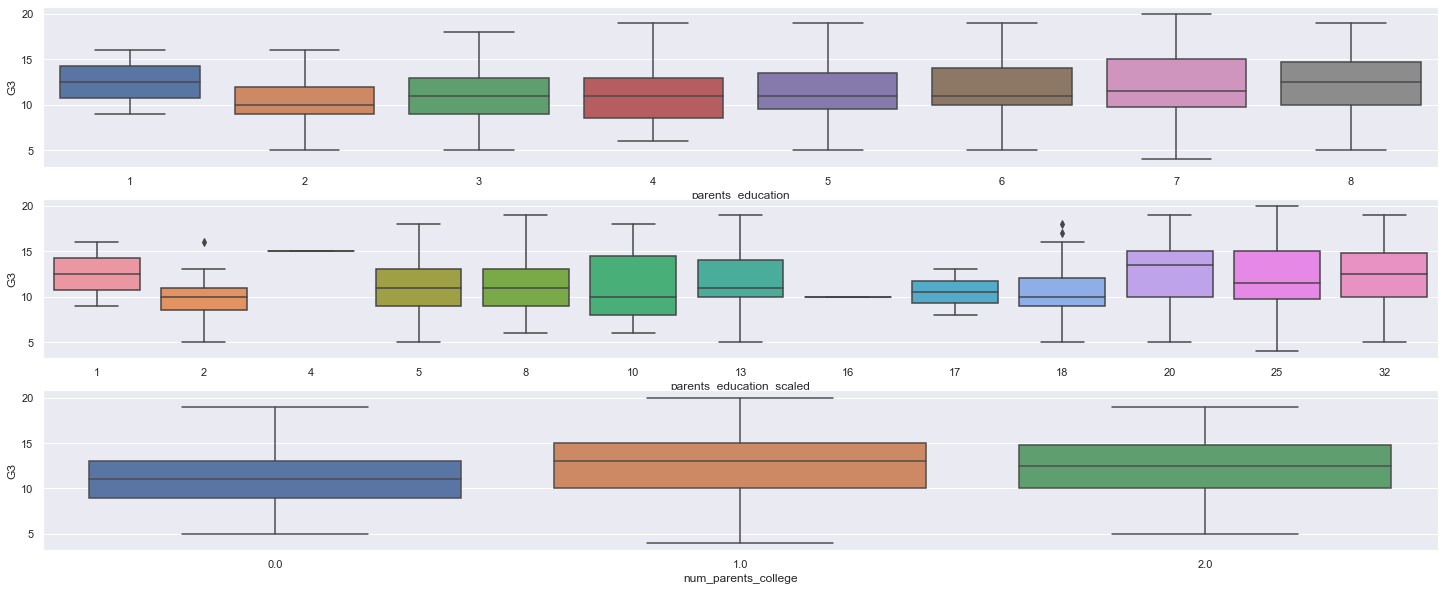

In [499]:
# graph each new feature to see if any have an obvious upward (mostly linear) trend. 
fig, axes = plt.subplots(3,1, figsize=(25,10))
sns.boxplot(x= 'parents_education', y= 'G3', data=data_final,  ax = axes[0])
sns.boxplot(x= 'parents_education_scaled',y= 'G3', data=data_final, ax = axes[1])
sns.boxplot(x= 'num_parents_college', y='G3', data=data_final, ax = axes[2])

From the plots, it looks like the simple addition of parents education levels might work the best

In [500]:
# look for feature variable correlations to final grade
abs(data_final.corr(method='pearson').loc['G3']).sort_values(ascending = False)

G3                          1.000000
G2                          0.965583
G1                          0.891805
failures                    0.293831
schoolsup                   0.238365
improvement                 0.224625
absences                    0.213129
parents_education_scaled    0.199587
num_parents_college         0.197355
parents_education           0.194736
Medu                        0.190308
Walc                        0.190054
alc_total                   0.186382
goout                       0.177383
Fedu                        0.158811
Fjob_teacher                0.158455
Mjob_other                  0.142541
Dalc                        0.140690
age                         0.140372
Mjob_health                 0.134581
address                     0.130090
studytime                   0.126728
higher                      0.113419
internet                    0.111624
sex                         0.102448
Mjob_services               0.102134
traveltime                  0.099785
M

performance of the all three feature variables related to parents education performed similarly well. It still looks to me that the linear addition still has the most linear relationship with final grade

Fitting a linear regression model

we will start by using final grade as a target

In [501]:
# consider dropping 'activities' and 'freetime'
features_final = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
        'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
        'activities', 'nursery', 'higher',  'internet', 'romantic', 'famrel',
        'goout', 'health', 'absences',
       'bio_parent_guardian',  'alc_total', 'parents_education']
X_final = data_final[features_final]
# X = data_fing.drop(['G1','G2','G3','improvement','guardian_mother','guardian_father','Dalc','Walc','Medu','Fedu','parents_education_scaled','num_parents_college','guardian_other'], axis = 1)
# dropping parent job features improved accuracy and decreased the range of coefficients
y_final = data_final['G3']
y_imp = data_final['improvement']
X_final.columns

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size = 0.25, random_state = 42)
reg_final = linear_model.LinearRegression(normalize = True)
reg_final.fit(X_train_final,y_train_final)
print('Coefficients: ', reg_final.coef_)
print('Variance score: {}'.format(reg_final.score(X_test_final,y_test_final)))
coefficients = pd.DataFrame(X_final.columns,reg_final.coef_)
print(coefficients)
predictions = reg_final.predict(X_test_final)

Coefficients:  [ 0.27058819  0.30536966 -0.20124414  0.44500338 -0.3257492  -1.09409194
  0.36943945 -0.96587176 -2.10023637 -0.55782855 -0.34067274  0.16730432
 -0.38744459  0.0631268   1.00783838 -0.12673699  0.15874627 -0.36058728
 -0.26119283 -0.06875285 -0.82208868 -0.09045555  0.20286326]
Variance score: 0.2477983102506398
                             0
 0.270588               school
 0.305370                  sex
-0.201244                  age
 0.445003              address
-0.325749              famsize
-1.094092              Pstatus
 0.369439            studytime
-0.965872             failures
-2.100236            schoolsup
-0.557829               famsup
-0.340673                 paid
 0.167304           activities
-0.387445              nursery
 0.063127               higher
 1.007838             internet
-0.126737             romantic
 0.158746               famrel
-0.360587                goout
-0.261193               health
-0.068753             absences
-0.822089  bio_par

it would appear that our model was only able to explain ~25% of final grade

Why does including parents jobs and reasons for school throw the coefficients off?

In [502]:
print(pd.DataFrame(predictions, y_test_final))

            0
G3           
12  13.853769
18  13.300240
11  11.160752
9   12.155825
15  15.088291
9   10.536784
14  12.451913
15  12.356737
9    8.357056
8   11.840952
6   11.293443
5   10.209769
12  12.994600
11  12.592509
13  12.855441
11  14.244314
11  12.165004
13  11.833965
14   9.320039
16  11.773870
10  11.496192
12  11.316661
9   12.458471
12  15.605954
16  12.291345
12  10.796694
7    7.536046
13  11.308157
8    8.438861
14  11.806516
11  11.293816
15  13.774131
10  10.493634
10  12.715215
19  13.415551
13   9.012463
16  14.117111
10  12.513007
14  13.179009
8   12.340413
10   9.157372
12  13.384269
14  11.473286
13  12.156319
9   12.458160
10  12.121664
10  13.133041
15  12.760064
6   11.751019
13  13.475653
18  13.335827
13  12.896792
13  10.941669
10   7.696578
7   11.028527
6   10.650400
15  12.693015
14  13.075980
10  14.259002
14  11.416330
9    9.899330
11  12.165260
9    8.865044
11  13.281893
5    6.512955
10  12.515549
14  12.885893
15  12.862666
10  13.208909
10  13

we can see alot of variation. clearly the features selected contribute to final outcomes, but there is just too much noise in the life of a student. 

now lets fit a model and use improvement as a target

In [503]:
# take another look at what features correlate wih improvement
data_final.corr(method='pearson').loc['improvement'].sort_values(ascending = False)

improvement                 1.000000
G3                          0.224625
school                      0.131395
G2                          0.128956
bio_parent_guardian         0.119046
address                     0.107757
internet                    0.079780
schoolsup                   0.065838
famsup                      0.061936
Fjob_other                  0.060098
Mjob_services               0.059432
famrel                      0.059188
reason_other                0.056920
Mjob_health                 0.038137
Medu                        0.036877
guardian_father             0.035894
guardian_mother             0.035562
famsize                     0.025535
Mjob_other                  0.021916
failures                    0.020219
parents_education_scaled    0.016153
parents_education           0.015200
reason_home                 0.013724
reason_course               0.011245
sex                         0.008048
Fjob_services               0.006269
num_parents_college        -0.003088
F

we can see that none of these features are strongly correlated with improvement.... 
the big surprise, the school itself was the strongest contributing factor. 

In [504]:
# consider dropping 'activities' and 'freetime'
features_imp = ['school', 'age', 'Pstatus', 
        'failures', 'schoolsup', 'famsup',
        'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 
       'bio_parent_guardian', 'alc_total']
X_imp = data_final[features_imp]
# X = data_fing.drop(['G1','G2','G3','improvement','guardian_mother','guardian_father','Dalc','Walc','Medu','Fedu','parents_education_scaled','num_parents_college','guardian_other'], axis = 1)
# dropping parent job features improved accuracy and decreased the range of coefficients
y_f = data_final['G3']
y_imp = data_final['improvement']
X_imp.columns

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size = 0.25, random_state = 42)
reg_imp = linear_model.LinearRegression(normalize = True)
reg_imp.fit(X_train_imp,y_train_imp)
print('Coefficients: ', reg_imp.coef_)
print('Variance score: {}'.format(reg_imp.score(X_test_imp,y_test_imp)))
coefficients = pd.DataFrame(X_imp.columns,reg_imp.coef_)
print(coefficients)
predictions = reg_imp.predict(X_test_imp)

Coefficients:  [ 0.33469038 -0.19286865 -0.47809437  0.25894834  0.08192162  0.21773305
 -0.33456702 -0.45597675  0.42164652 -0.209312    0.14102611 -0.13831471
 -0.13133967  0.67421118  0.01759768]
Variance score: -0.016770801658042345
                             0
 0.334690               school
-0.192869                  age
-0.478094              Pstatus
 0.258948             failures
 0.081922            schoolsup
 0.217733               famsup
-0.334567              nursery
-0.455977               higher
 0.421647             internet
-0.209312             romantic
 0.141026               famrel
-0.138315             freetime
-0.131340                goout
 0.674211  bio_parent_guardian
 0.017598            alc_total


In [505]:
print(pd.DataFrame(predictions, y_test_imp))

                    0
improvement          
-1           0.563677
-1           0.684315
 0          -0.093554
-1           0.205145
 1           1.293749
 2          -1.298227
 0           0.239390
 1           0.391297
 0          -0.435762
 0          -0.064227
-1           0.414661
-1          -0.898985
 0           0.809367
-1           0.381467
-1           0.204839
 4           1.089652
 0           0.324087
 0           0.995639
 2          -0.262365
 2          -0.514336
 0           0.772476
 0          -0.897035
-1          -0.008946
 4           1.073515
 0           0.299158
-1          -0.080888
 2           0.857960
 1          -0.018515
 2           1.225682
 2           0.159628
-1           0.080530
 1           0.811391
 0          -0.056721
 0           0.730641
 1           0.180266
-1           0.607270
 1           0.294959
-1           0.100206
 3           0.552976
 1           0.317330
 0          -0.852603
 3           1.240922
 2          -0.049049
 3        

there is too much noise in the data. unfortunately the features I have selected can not explain the relative improvement of a students grade

Can we determine which factors contribute to a student dropping out and recieveing a final grade (G3) of 0

In [506]:
data['dropped'] = np.where(data['G3']==0, 1, 0)
data.corr(method='pearson').loc['dropped'].sort_values(ascending = False)

dropped                     1.000000
failures                    0.257801
romantic                    0.132894
age                         0.097983
reason_course               0.089963
Mjob_at_home                0.080065
famsize                     0.075169
traveltime                  0.073605
guardian_other              0.060463
Pstatus                     0.054732
Fjob_at_home                0.042134
goout                       0.029832
reason_home                 0.029079
activities                  0.028565
health                      0.011944
school                      0.011384
Mjob_other                  0.007803
Fjob_teacher                0.006917
Fjob_services               0.006141
Fjob_other                  0.002141
famsup                     -0.004953
guardian_father            -0.013473
Mjob_services              -0.017773
guardian_mother            -0.023475
studytime                  -0.024039
address                    -0.031655
freetime                   -0.033968
f

we can see that the features most correlated with dropping out were: being in a romantic relationship, having failed classes before, and age (being older).
the features that were most correlated with not dropping out were: paid outside help, desire to go to college, and parents education level. 